<a href="https://colab.research.google.com/github/udz2002/applied-data-science/blob/main/FDS_Assignment_Submission_Udz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# FDS Assignment
# Introduction
  # I am going to start with loading and exploring the 'Student_Performance  dataset from Kaggle.
  # Link to the data set : https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download
  # This dataset contains detailed information about ssecondary school students and their academic outcomes.

# My main overall project goals include
  # Build a multiple Linear Regression model to  quantify how each factor in the data incfluence the performance score.
  # Apply PCA to reduce dimensionality and analyse the data to find the most important underlying components that explain student performance variance.
  # Compare and interpret both models to provide data driven insights and recommendationsfor improving academic outcomes.


**SECTION 1**

In [4]:
# Section 1 : Dataset Understanding and Problem Framing
# My goal for this section is to:
  # Import libraries required
  # Load and inspect the dataset
  # Describe its structure and main variables
  # Frame the problem type
  # Explain why regression is the appropriate modelling approach and why I want to explore PCA as the second choice.

 # Import libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

  # Load and inspect the dataset
df = pd.read_excel("Student_Performance.xlsx")
print(df.columns.tolist())
print("shape of dataset:", df.shape)

# Preview Dataset
df.head()

# Check for missing values
df.isnull().sum()



['Student_Performance', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']
shape of dataset: (10001, 6)


,0
Student_Performance,0
Unnamed: 1,0
Unnamed: 2,0
Unnamed: 3,0
Unnamed: 4,0
Unnamed: 5,0


In [5]:
# The coloumn names are on the 2nd Row. I am going to reload this.
df = pd.read_excel("Student_Performance.xlsx", header=1)
df.head()
print("corrected column names:\n", df.columns.tolist())
print("\nShape:", df.shape)

corrected column names:
 ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

Shape: (10000, 6)


**Section 1 : Observations from the above analysis**

**Describe its structure and main variables**
- It appears that the data set consists of 10000 rows and 6 coloumns.
- Each row represents one student's record
- Great to see that there are no missing values
- The target variable is Performance Index which shows each student's overall performance score.

**Frame the problem type**
- The goal here is to predict a student's Performance Index (numerical) based on their other attributes.
- Since the value I want to predict is continuos and numberic, this is a regression problem.
- By solving it, I can find a mathematical relationship between the independant varaiables (like hours studies or sleep hours) and the dependant variable (performance index)

Why regression is the appropriate modelling approach and why I want to explore PCA as the second choice.**
- Regression helps to estimate how much each factor actually impacts the performance.
- I selected PCA for my second method as it will help me understand if some of these features are correlated with each other. By reducing the dimensions, I can find the most important underlying factors that explain performance differences.
- In conclusion : using both these will help me understand how to predict the scores and which compinations of factors matter the most.


**SECTION 2 **

In [14]:
# Section 2 : Data Processing and Feature Engineering
# The goal of this section is to prepare the datasetfor analysis.
# Hence I will:
  # Clean the data and correct any issues with column types
  # Convert all variables to numeric form
  # Create new variables that could help improve the performance of my regression and PCA models

# Step 1: Check the data types and covert all to numeric
df.dtypes


,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,int64


In [15]:
# It appears that Extracurricular Activities is an 'object' type. Need to convert.
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.dtypes
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [20]:
# Step 4 :  Feature engineering
# I want to create two new features that might help the model
 # 1 high_study_hours : To mark students who study more than the median hours
 # 2 study_efficiency : hours studies/sleep hours (to capture balance between study and rest)

median_hours = df['Hours Studied'].median()
df['high_study_hours'] = np.where(df['Hours Studied'] > median_hours, 1, 0)
df['study_efficiency'] = df['Hours Studied'] / df['Sleep Hours']
df.head()



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,high_study_hours,study_efficiency
0,7,99,1,9,1,91,1,0.777778
1,4,82,0,4,2,65,0,1.000000
2,8,51,1,7,2,45,1,1.142857
3,5,52,1,5,2,36,0,1.000000
4,7,75,0,8,5,66,1,0.875000


In [21]:
# Step 5 : Final structure
print("Final shape of dataset", df.shape)
df.info()

Final shape of dataset (10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  int64  
 6   high_study_hours                  10000 non-null  int64  
 7   study_efficiency                  10000 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 625.1 KB


**SECTION 3 **

In [24]:
# Section 3 : Exploratory Data Analysis (EDA)
# The foal of this section is to explore my dataset and understand the relationships between the variables.
# Hence, I will do the following
  # Geneate summary statistics for all numeric coloumns
  # Plot graphs to identify trends and correlations
  # Explain which factors seem to affect student performance the most

# Step 1 : Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.992900,2.589309,1.000000,3.000000,5.00,7.000000,9.00
Previous Scores,10000.0,69.445700,17.343152,40.000000,54.000000,69.00,85.000000,99.00
Extracurricular Activities,10000.0,0.494800,0.499998,0.000000,0.000000,0.00,1.000000,1.00
Sleep Hours,10000.0,6.530600,1.695863,4.000000,5.000000,7.00,8.000000,9.00
Sample Question Papers Practiced,10000.0,4.583300,2.867348,0.000000,2.000000,5.00,7.000000,9.00
Performance Index,10000.0,55.224800,19.212558,10.000000,40.000000,55.00,71.000000,100.00
high_study_hours,10000.0,0.446500,0.497154,0.000000,0.000000,0.00,1.000000,1.00
study_efficiency,10000.0,0.823474,0.499870,0.111111,0.428571,0.75,1.142857,2.25


From the above table I see that:
- On average, students study about 5 hours per day
- Average previous score is 69 marks
- They sleep on average about 6.5hours
- High study hours show us that 45% of students study more than the mean number of hours
- study efficiency average is around 0.8 on average, which shows most studients spend slightly less time studying than sleeping.
- Standard Deviation is high for Previous scores and Performance index. This shows that students' marks and overall performance vary a lot.

In [25]:
# Step 2 : Correlation Analysis
corr = df.corr()
corr

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,high_study_hours,study_efficiency
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730,0.865994,0.850126
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189,-0.011646,-0.009723
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525,0.000691,0.013356
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106,-0.002269,-0.454067
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268,0.013159,0.015481
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000,0.322871,0.298930
high_study_hours,0.865994,-0.011646,0.000691,-0.002269,0.013159,0.322871,1.000000,0.739718
study_efficiency,0.850126,-0.009723,0.013356,-0.454067,0.015481,0.298930,0.739718,1.000000


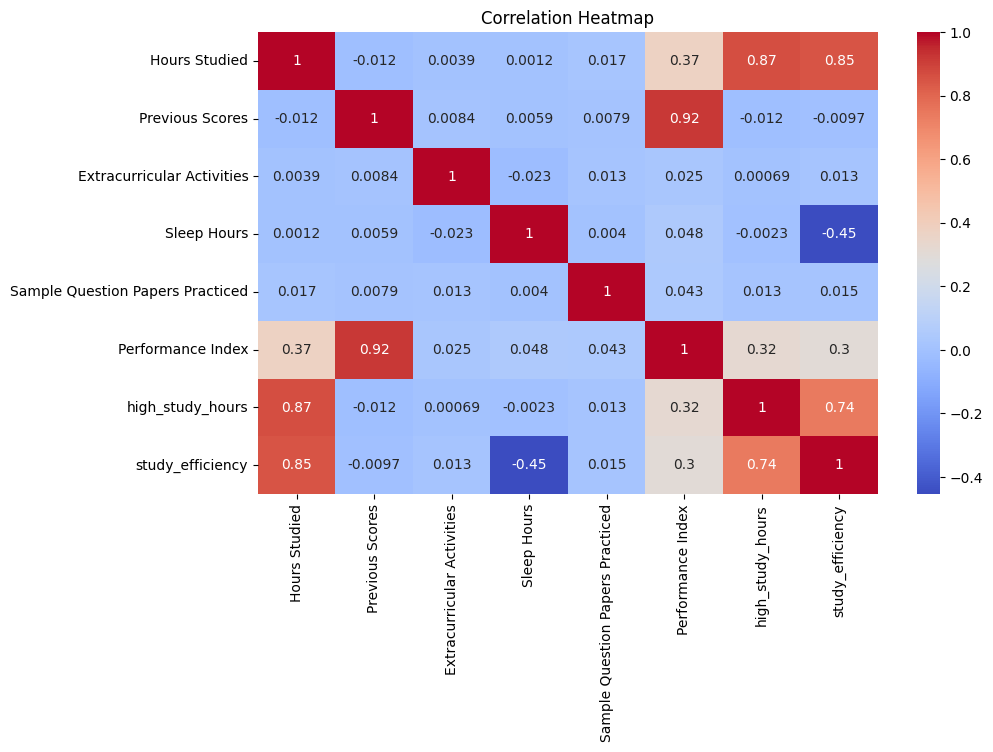

In [26]:
# Step 3 : Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Some interesting findings from the correaltion analysis above show that:**
- The Performance Index has:
  - A very strong positive correation with Previous Scores(0.92). Which shows that students who scored well before tend to continue to perform well.
  - Weak correlation with Extracurricular Activities, Sleep Hours and Practice papers show that these don't have a strong correalation with the final performance score.

- Study_efficiency has a positive correation with Performance Index. (0.3). Shows that students who study efficiently relative to their sleep time usually achieve higher scores. It also has a negative correlation (-0.45) with Sleep Hours. Which shows that as study efficiency increases, sleep tends to decrease. Studying more means less time to sleep.

- High_study_hours shows a 0.32 positive correlation with Performance Index. This shows that students who study more than average tend to perform better.


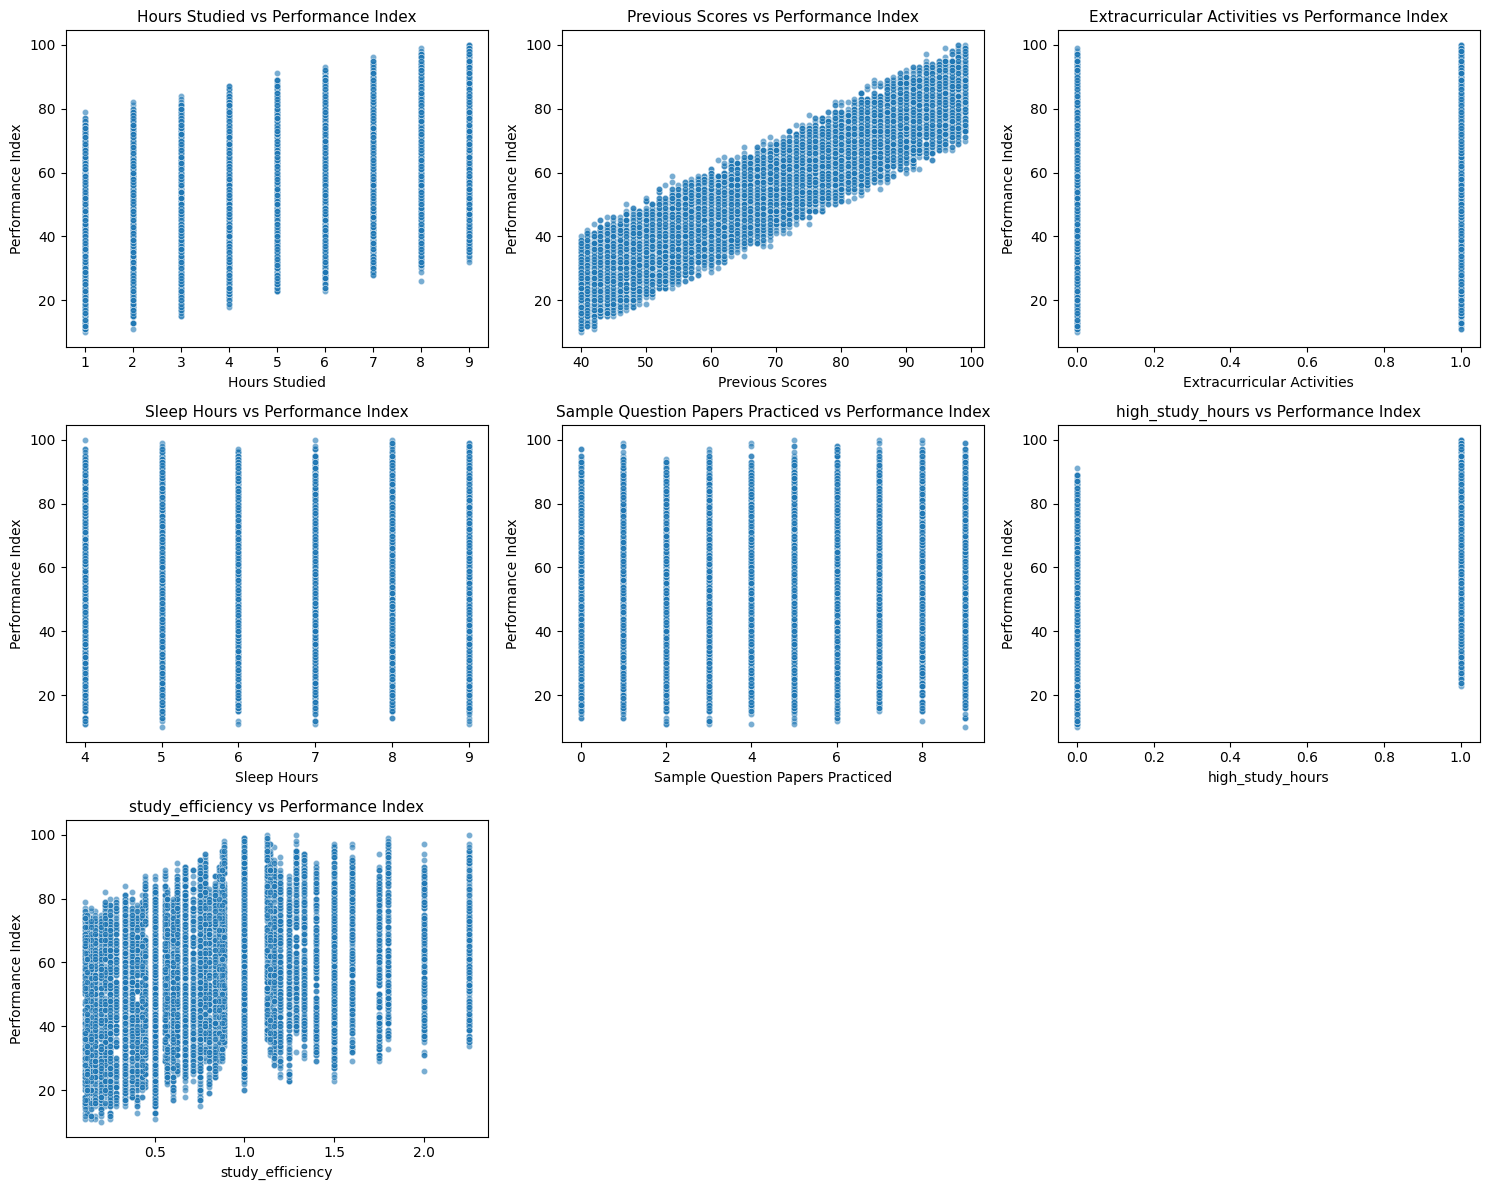

In [29]:
# Step 4 : Visualising all key features against Performance Index

Features = [
    'Hours Studied',
    'Previous Scores',
    'Extracurricular Activities',
    'Sleep Hours',
    'Sample Question Papers Practiced',
    'high_study_hours',
    'study_efficiency',
]

target = 'Performance Index'

# Create subplots (3 rows x 3 coloumn)
fig, axes = plt.subplots(3, 3, figsize=(15,12))
axes = axes.flatten()

for i, feature in enumerate(Features):
    sns.scatterplot(x=feature, y=target, data=df, ax=axes[i], s=20, alpha=0.6,
    color="#1f77b4"
    )
    axes[i].set_title(f"{feature} vs {target}", fontsize=11)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Performance Index")

# Hide any empty sublopt frames
for i in range(len(Features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Key learnings from the plots above:**
- Students who did well previously almost always perform better again.
- Studying more hours generally helps, but not as strongly as previous performance.
- Studients who study more than the median or who study efficiently relative to sleep, tend to score higher.
- Students with and without extracurriculars perform more or less the same.
- Practicing past papers may help a bit.


**Section 4 : Algorithm Implementation (Model Development)**

In this section, I will build and test two algorithms:
1. Multiple Linear Regression
2. Principal Component Analysis (PCA)

My goal here is to compare both approached and see how well they predict the Performance Index.

In [31]:
# Step 1  - Prepare the date for modellings
# Dataset will be split into two : feateres (x) and target(y)

#Define features and target
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced' , 'high_study_hours', 'study_efficiency']]
y = df['Performance Index']

In [33]:
# Step 2 - Multiple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Train and predict on full data
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

# Evaluate
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print("Multiple Linear Regression Results:")
print("r2 Score:", round(r2, 3))
print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))

Multiple Linear Regression Results:
r2 Score: 0.989
RMSE: 2.037
MAE: 1.617


In [34]:
# Display feature coefficients

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
0,Hours Studied,2.881546
1,Previous Scores,1.018458
2,Extracurricular Activities,0.612896
3,Sleep Hours,0.450593
4,Sample Question Papers Practiced,0.193913
5,high_study_hours,0.049176
6,study_efficiency,-0.223718


**Key findings from the Multiple Linear Regression Analysis:**

- The results show that the model explains about 98.9% of the variance in student performance. It means that the chosen variables together do a very good job of predicting the final Performance Index.

- The low RMSE (2.03) and MAE (1.62) shows that the model's prediction errors are very small.

- This suggests that:
  - Previous Scores and Hours Studies are the most important predictors aligning with what I found earlier.


**Looking at the Coefficient Analysis:**
- Hours Studied - 2.88 - The strongest positive effect : every extra hour studied increasses performance by almost 3 points.
- Previous Scores - 1.02 - Higher past scores predict better future performance.
- During the EDA stage, the scatterplots showed that Extracurricular Activities and Sleep Hours didn't have much impact. However, the regression model assigns both of them positive coefficients. Since the regression model looks at the combines effect of all variables together, this might result in a positive outcome due to possible interactions - e.g. Students who lead a more balanced life and sleep might also have good time management skills leading to better performance.

Overall, the regression model performs well.

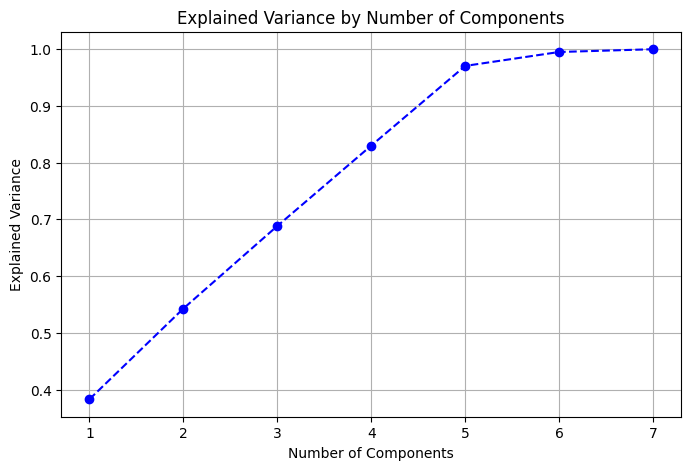

In [36]:
#Apply PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_scales = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scales)

# Explained variance plot
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [38]:
# Step 5 - Choose Components and run regression on PCA data

# Keep components explaining ~95% variance
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scales)

# Apply Linear Regression
lr_pca = LinearRegression()
lr_pca.fit(X_pca, y)
y_pred_pca = lr_pca.predict(X_pca)

# Evaluate
r2_pca = r2_score(y, y_pred_pca)
mae_pca = mean_absolute_error(y, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y, y_pred_pca))

print("PCA Regression Results:")
print("r2 Score:", round(r2_pca, 3))
print("RMSE:", round(rmse_pca, 3))
print("MAE:", round(mae_pca, 3))

PCA Regression Results:
r2 Score: 0.982
RMSE: 2.575
MAE: 2.071


Learnings from PCA Results:

- This shows that the model with PCA explains about 98.2% of the variance in performance. Only slightly less than the original regression model. (98.9%)
- This is amazing as PCA reduced the data from 7 original variables down to just 5 components.
- There is a slight drop in accuracy but this I feel is expected after dimensionality reduction.
- The cumulative variance graph shows that the first component already explains about 40% of the variance.
- By the 5th component, around 95% of the total variance is captured. Showing that the PCA successfully simplified the dataset without a lot of information loss.

**Section 5 - Evaluation of Results**

In this section, I will evaluate and compare both models.
Multiple Linear Regression and PCA using the following:

- r2 : How much variance in the target variable is explained by the model. Higer is better.
- MAE : Mean Abolute Error is the average absolute difference between predicted and actual values. Lower is better.
- RMSE : Root mean squared error : similar to MAE but gives more weight to larger errors. Lower is better.

In [3]:
# Step 1 - Create Comparison Table

comparison = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'PCA'],
    'r2': [0.989, 0.982],
    'MAE': [2.037, 2.575],
    'RMSE': [1.617, 2.071]
})

comparison

,Model,r2,MAE,RMSE
0,Multiple Linear Regression,0.989,2.037,1.617
1,PCA,0.982,2.575,2.071


**Section 5 : Key Observations and Interpretations**
- The Multiple Linear Regression model performs slightly better overall, with a higher r2 and lower error values.
- It explains about 98.9% of the variations in student performance indicating that it fits the data set well.
- The PCA model is slightly less accurate but still performs very well. It explains about 98.2% of the variance even after reducing the dataset to just 5 components.


**Key Insights**
- Both models tell a consistent story.
- Previous Scores and Hours Studies are the strongest predictors of performance.
- Study Efficiency had a small negative impact, suggesting that overstudying at the cost of sleep might hurt results.
- Extracurricular Activities and Sleep Hours show minor positive effects, but they are not as strong as academic factors.


**Final Interpretations
Overall, the regression model gives the most accurate predictions, while PCA provides a simplified version of the same insight.

In summary:
- Regression gave me a detailed understanding of what drives scores.
- PCA gave me a big-picture understanding of how features group together.

Both models reinforce that consistent studying and good academic history are the strongest drivers of high performance.